# The Sparks Foundation
# Task 7 : Stock Market Prediction Using Numerical Analysis and Textual   Analysis

#### Author: Precious Iyekeoretin

#### Objective:
Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock price,and sentimental analysis of news headlines

#### stock used to analyze and predict : SENSEX(S&P BSE SENSEX) 

#### Dataset:

* historical stock price : https://finance.yahoo.com/
* News headlines : https://bit.ly/36fFPI6

##### Step 1: Importing the required Libraries

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
start_date = datetime(2017, 1, 1)
end_date = datetime(2022, 9, 13)
  
# getting the stock dataset from yahoo and save it as csv file then pass it to pandas
data = yf.download("^BSESN", start = start_date,end = end_date)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,26711.150391,26720.980469,26447.060547,26595.449219,26595.449219,8000
2017-01-03,26616.919922,26724.400391,26488.369141,26643.240234,26643.240234,9800
2017-01-04,26677.220703,26723.369141,26606.060547,26633.130859,26633.130859,8100
2017-01-05,26738.419922,26917.210938,26738.419922,26878.240234,26878.240234,9800
2017-01-06,26929.689453,27009.609375,26733.330078,26759.230469,26759.230469,7800


In [2]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,26711.150391,26720.980469,26447.060547,26595.449219,26595.449219,8000
2017-01-03,26616.919922,26724.400391,26488.369141,26643.240234,26643.240234,9800
2017-01-04,26677.220703,26723.369141,26606.060547,26633.130859,26633.130859,8100
2017-01-05,26738.419922,26917.210938,26738.419922,26878.240234,26878.240234,9800
2017-01-06,26929.689453,27009.609375,26733.330078,26759.230469,26759.230469,7800


In [3]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-06,59285.359375,59566.671875,58974.261719,59196.988281,59196.988281,13800
2022-09-07,58789.261719,59166.460938,58722.890625,59028.910156,59028.910156,9000
2022-09-08,59374.988281,59711.960938,59315.710938,59688.218750,59688.218750,12100
2022-09-09,60045.750000,60119.800781,59634.390625,59793.140625,59793.140625,13100
2022-09-12,59912.289062,60284.550781,59912.289062,60115.128906,60115.128906,14300


In [4]:
#Converting this obtained file into CSV.
data.to_csv("Stock_price.csv")

##### Step 2: Import Datasets

In [5]:
#Importing the stock market price dataset which is in csv.
stock=pd.read_csv("Stock_price.csv")

#Importing the Indian_news_headlines dataset which is in csv.
news = pd.read_csv('india-news-headlines.csv')
news.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [6]:
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,26711.150391,26720.980469,26447.060547,26595.449219,26595.449219,8000
1,2017-01-03,26616.919922,26724.400391,26488.369141,26643.240234,26643.240234,9800
2,2017-01-04,26677.220703,26723.369141,26606.060547,26633.130859,26633.130859,8100
3,2017-01-05,26738.419922,26917.210938,26738.419922,26878.240234,26878.240234,9800
4,2017-01-06,26929.689453,27009.609375,26733.330078,26759.230469,26759.230469,7800


In [7]:
stock.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1398,2022-09-06,59285.359375,59566.671875,58974.261719,59196.988281,59196.988281,13800
1399,2022-09-07,58789.261719,59166.460938,58722.890625,59028.910156,59028.910156,9000
1400,2022-09-08,59374.988281,59711.960938,59315.710938,59688.218750,59688.218750,12100
1401,2022-09-09,60045.750000,60119.800781,59634.390625,59793.140625,59793.140625,13100
1402,2022-09-12,59912.289062,60284.550781,59912.289062,60115.128906,60115.128906,14300


In [8]:
stock.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume
691,2019-10-29,39293.488281,39917.011719,39254.121094,39831.839844,39831.839844,50500
381,2018-07-13,36635.140625,36740.070312,36501.609375,36541.628906,36541.628906,11900
1269,2022-02-25,55321.718750,56183.699219,55299.281250,55858.519531,55858.519531,9900
983,2020-12-31,47753.109375,47896.968750,47602.121094,47751.328125,47751.328125,13900
1114,2021-07-14,52801.441406,52978.578125,52611.968750,52904.050781,52904.050781,9300
1176,2021-10-13,60619.910156,60836.628906,60452.289062,60737.050781,60737.050781,8500
1118,2021-07-20,52432.878906,52465.031250,52013.511719,52198.511719,52198.511719,8000
1068,2021-05-10,49496.050781,49617.468750,49412.050781,49502.410156,49502.410156,12200
28,2017-02-10,28367.169922,28456.179688,28286.800781,28334.250000,28334.250000,13700
38,2017-02-27,28910.500000,28961.830078,28791.189453,28812.880859,28812.880859,12000


In [9]:
news.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [10]:
news.tail()

,publish_date,headline_category,headline_text
3650965,20220331,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
3650966,20220331,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967,20220331,city.trichy,As Covid-19 cases drop to nil in southern dist...
3650968,20220331,city.erode,Tamil Nadu sees marginal rise of Covid cases w...
3650969,20220331,city.salem,Tamil Nadu sees marginal rise of Covid cases w...


In [11]:
news.sample(10)

,publish_date,headline_category,headline_text
1459316,20120919,city.ranchi,Class IX girl gang-raped in Lohardaga; 2 arrested
2835164,20180213,city.coimbatore,For 2 years; Siddha dept at CMCH running witho...
1781471,20131226,city.bhopal,Youth held for raping; blackmailing teen
2434115,20160718,city.mangaluru,Mangalore University likely to cap student int...
3374189,20200923,tv.news.hindi,Karanvir Bohra: Shooting won't be easy; but we...
355668,20050511,lucknow-times,The I-template
500829,20070822,business.india-business,China may turn top outsourcing hub
933130,20100622,india,Civil society urges PM to ban child labour
1149376,20110623,city.mumbai,Sajjan Jindal puts Morena House on the block
2300007,20160108,city.ahmedabad,HC seeks reply over changes in poll rules


In [12]:
print("The shape of the Stock Price Dataset is:",stock.shape)
print("The shape of the Indian_news_headlines Dataset is",news.shape)

The shape of the Stock Price Dataset is: (1403, 7)
The shape of the Indian_news_headlines Dataset is (3650970, 3)


##### Step 3: Pre-Processing of Data

In [13]:
news.shape

(3650970, 3)

In [14]:
news.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [15]:
#We don't need headline_category , so let's drop it.
news.drop(columns=['headline_category'],inplace=True)
news.head()

,publish_date,headline_text
0,20010102,Status quo will not be disturbed at Ayodhya; s...
1,20010102,Fissures in Hurriyat over Pak visit
2,20010102,America's unwanted heading for India?
3,20010102,For bigwigs; it is destination Goa
4,20010102,Extra buses to clear tourist traffic


In [16]:
#Lets rename the column names of news dataset.
news.rename(columns={'publish_date':'Date','headline_text':'News'},inplace=True)
news.head()

,Date,News
0,20010102,Status quo will not be disturbed at Ayodhya; s...
1,20010102,Fissures in Hurriyat over Pak visit
2,20010102,America's unwanted heading for India?
3,20010102,For bigwigs; it is destination Goa
4,20010102,Extra buses to clear tourist traffic


In [17]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 0 to 3650969
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Date    int64 
 1   News    object
dtypes: int64(1), object(1)
memory usage: 55.7+ MB


In [18]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403 entries, 0 to 1402
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1403 non-null   object 
 1   Open       1403 non-null   float64
 2   High       1403 non-null   float64
 3   Low        1403 non-null   float64
 4   Close      1403 non-null   float64
 5   Adj Close  1403 non-null   float64
 6   Volume     1403 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 76.9+ KB


In [19]:
#We can see the datatype of Date in News dataset is integer where as in Stock dataset it is object.
#Lets convert them to objects first and then to datetime. so that there format and nature will be same as we may need to merge the
#further.

news['Date']=news['Date'].apply(str)

In [20]:
news['Date'].dtype

dtype('O')

In [21]:
stock['Date'].dtype

dtype('O')

In [22]:
#Now lets change then to datetime.
stock['Date'] = pd.to_datetime(stock['Date'])
stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,26711.150391,26720.980469,26447.060547,26595.449219,26595.449219,8000
1,2017-01-03,26616.919922,26724.400391,26488.369141,26643.240234,26643.240234,9800
2,2017-01-04,26677.220703,26723.369141,26606.060547,26633.130859,26633.130859,8100
3,2017-01-05,26738.419922,26917.210938,26738.419922,26878.240234,26878.240234,9800
4,2017-01-06,26929.689453,27009.609375,26733.330078,26759.230469,26759.230469,7800
...,...,...,...,...,...,...,...
1398,2022-09-06,59285.359375,59566.671875,58974.261719,59196.988281,59196.988281,13800
1399,2022-09-07,58789.261719,59166.460938,58722.890625,59028.910156,59028.910156,9000
1400,2022-09-08,59374.988281,59711.960938,59315.710938,59688.218750,59688.218750,12100
1401,2022-09-09,60045.750000,60119.800781,59634.390625,59793.140625,59793.140625,13100


In [23]:
news['Date'] = pd.to_datetime(news['Date'])
news

,Date,News
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic
...,...,...
3650965,2022-03-31,J&K sacks 2 cops; 3 other employees over terro...
3650966,2022-03-31,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967,2022-03-31,As Covid-19 cases drop to nil in southern dist...
3650968,2022-03-31,Tamil Nadu sees marginal rise of Covid cases w...


In [24]:
#Just to look whether they are able to get merged or not ,lets perform the merge.
Temp_merge=pd.merge(news,stock,how='inner',on='Date')
Temp_merge

,Date,News,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,Destress plan for the first Monday of 2017,26711.150391,26720.980469,26447.060547,26595.449219,26595.449219,8000
1,2017-01-02,Pune: Tribunal grants Rs 28.93 lakh as damage ...,26711.150391,26720.980469,26447.060547,26595.449219,26595.449219,8000
2,2017-01-02,Villages near Tehri Lake; Devalsari and Ranikh...,26711.150391,26720.980469,26447.060547,26595.449219,26595.449219,8000
3,2017-01-02,Rebellion; show of unity; sting operations; Co...,26711.150391,26720.980469,26447.060547,26595.449219,26595.449219,8000
4,2017-01-02,Haldwani surgeons find 'belan' in woman's abdomen,26711.150391,26720.980469,26447.060547,26595.449219,26595.449219,8000
...,...,...,...,...,...,...,...,...
742922,2022-03-31,J&K sacks 2 cops; 3 other employees over terro...,58779.710938,58890.921875,58485.789062,58568.511719,58568.511719,4400
742923,2022-03-31,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...,58779.710938,58890.921875,58485.789062,58568.511719,58568.511719,4400
742924,2022-03-31,As Covid-19 cases drop to nil in southern dist...,58779.710938,58890.921875,58485.789062,58568.511719,58568.511719,4400
742925,2022-03-31,Tamil Nadu sees marginal rise of Covid cases w...,58779.710938,58890.921875,58485.789062,58568.511719,58568.511719,4400


In [25]:
Temp_merge.isnull().sum()   #No null value is there.

Date         0
News         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [26]:
#This is to check whether there is any null value present in the dataset or not.
news.isnull().sum()    #This shows no null value is there in any of the column.

Date    0
News    0
dtype: int64

In [27]:
#This is to check wheather there is any duplicate value is there or not?
news.duplicated().sum()

162098

In [28]:
#3626110 this must be non duplicate values.Lets obtain it by code.
news.drop_duplicates(inplace=True)

In [29]:
news.duplicated().sum()     # This 0 shows that , there is no more dupliacte values .Lets check the shape now rows must be
                            #equal to 3488872.

0

In [30]:
news.shape   #We got the correct answer.Lets move further.

(3488872, 2)

In [39]:
#Lets Remove the special charaters from the news text by creating a function.
def remove_special_chars(text):
    result=" "
    
    for i in text:
        if i.isalnum()  or i==' ':   # The isalnum() method returns True if all characters in the string are alphanumeric 
                                     # (either alphabets or numbers). If not, it returns False.
            result= result+i
            # print(result)
        else:
            result=result + " "
    return result.strip()        

In [40]:
news['News'][0]    #here  ; semicolon is a special charater.

'Status quo will not be disturbed at Ayodhya; says Vajpayee'

In [41]:
remove_special_chars('Status quo will not be disturbed at Ayodhya; says Vajpayee')


'Status quo will not be disturbed at Ayodhya  says Vajpayee'

In [42]:
news['News'][2]    #here ? question mark is a special charater.

"America's unwanted heading for India?"

In [43]:
remove_special_chars("America's unwanted heading for India?")

'America s unwanted heading for India'

In [44]:
#So ensures that this function is working.

In [45]:
headlines_df=news

In [46]:
#Applying the special charater removal function of news headlines.

headlines_df['News']=headlines_df['News'].apply(remove_special_chars)

In [47]:
#So we can compare Before_removal of Special charater and after removal of special charater.

In [48]:
before=news['News'][2]
before

'America s unwanted heading for India'

In [49]:
after=headlines_df['News'][2]                 #This shows this function got applied on all the text healines.
after

'America s unwanted heading for India'

In [50]:
#Grouping all the headlines for each day.

headlines_df['News']=headlines_df.groupby(['Date']).transform(lambda x: " ".join(x))   

#This is to join all the news of same date, in just one paragraph kind of.

In [51]:
headlines_df.head(30)     #This seems like , the grouped text para , is repeating itself.
                          #Also indexing is also not correct as after 25 ,  52 appeard which is wrong.
                          

,Date,News
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...
1,2001-01-02,Status quo will not be disturbed at Ayodhya s...
2,2001-01-02,Status quo will not be disturbed at Ayodhya s...
3,2001-01-02,Status quo will not be disturbed at Ayodhya s...
4,2001-01-02,Status quo will not be disturbed at Ayodhya s...
5,2001-01-02,Status quo will not be disturbed at Ayodhya s...
6,2001-01-02,Status quo will not be disturbed at Ayodhya s...
7,2001-01-02,Status quo will not be disturbed at Ayodhya s...
8,2001-01-02,Status quo will not be disturbed at Ayodhya s...
9,2001-01-02,Status quo will not be disturbed at Ayodhya s...


In [52]:
#Lets check the paragraph first of any two index.

In [53]:
headlines_df['News'][0]

'Status quo will not be disturbed at Ayodhya  says Vajpayee Fissures in Hurriyat over Pak visit America s unwanted heading for India For bigwigs  it is destination Goa Extra buses to clear tourist traffic Dilute the power of transfers  says Riberio Focus shifts to teaching of Hindi IT will become compulsory in schools Move to stop freedom fighters  pension flayed Gilani claims he applied for passport 2 years ago Parivar dismisses PM s warning India  Pak exchange lists of N plants Will Qureshi s return really help the govt PM s tacit message  Put Ram tample on hold Text of the Prime Minister s article NCW to focus on violence against women BBC s reality TV will focus on AIIMS Jaitley firm on legal reforms Hoshangabad farmers have enough water BJP jumps into rail track conversion issue State may take AP to court over Krishna This official has sued the briber Park turns temple compound as residents watch Moves afoot to evict squatters in Urban dist Mafia calls the shots in Gandhinagar too

In [54]:
headlines_df['News'][10]

'Status quo will not be disturbed at Ayodhya  says Vajpayee Fissures in Hurriyat over Pak visit America s unwanted heading for India For bigwigs  it is destination Goa Extra buses to clear tourist traffic Dilute the power of transfers  says Riberio Focus shifts to teaching of Hindi IT will become compulsory in schools Move to stop freedom fighters  pension flayed Gilani claims he applied for passport 2 years ago Parivar dismisses PM s warning India  Pak exchange lists of N plants Will Qureshi s return really help the govt PM s tacit message  Put Ram tample on hold Text of the Prime Minister s article NCW to focus on violence against women BBC s reality TV will focus on AIIMS Jaitley firm on legal reforms Hoshangabad farmers have enough water BJP jumps into rail track conversion issue State may take AP to court over Krishna This official has sued the briber Park turns temple compound as residents watch Moves afoot to evict squatters in Urban dist Mafia calls the shots in Gandhinagar too

In [55]:
#So we can clearly observe that this is repeating the entire paragraph so we need to drop the duplicates and reset the index .
headlines_df.drop_duplicates(inplace=True)

In [56]:
headlines_df.reset_index(inplace=True,drop=True)

In [57]:
headlines_df.head()

,Date,News
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...
1,2001-01-03,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...


In [58]:
headlines_df.shape    #Now we have only the unique news and shape got reduced to 7717.

(7717, 2)

##### Step 4: Textual Dataset Pre-Processing 

###### Understand the Polarity and Subjectivity 


* Polarity, also known as orientation of the emotion expressed in the sentence. It can be positive, neagtive or neutral.
* Subjectivity is when text is an explanatory article which must be analysed in context.

In [59]:
#Function to get Subjectivity and Polarity.

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity


def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [60]:
#Applying subjectivity and polarity to the columns

headlines_df['Subjectivity']=headlines_df['News'].apply(get_subjectivity)
headlines_df['Polarity']=headlines_df['News'].apply(get_polarity)

Text(0.5, 1.0, 'Polarity Score')

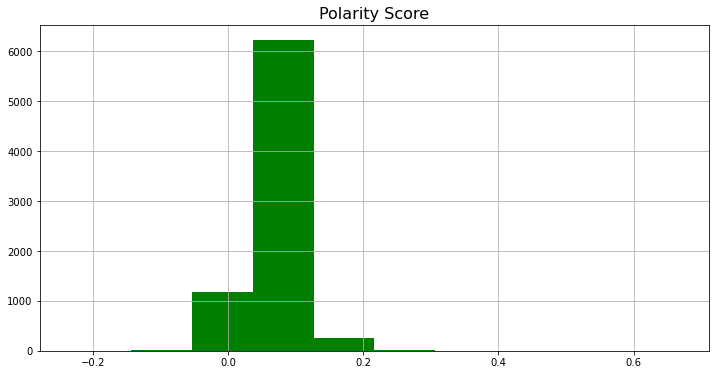

In [61]:
plt.figure(figsize=(12,6))
headlines_df['Polarity'].hist(color='green')
plt.title("Polarity Score",fontsize=16)

Text(0.5, 1.0, 'Subjectivity Score')

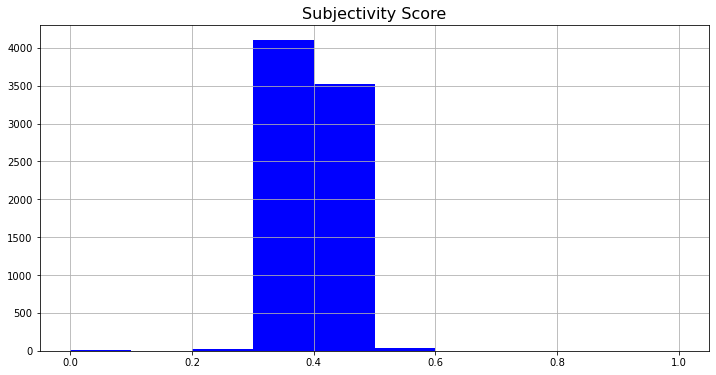

In [62]:
plt.figure(figsize=(12,6))
headlines_df['Subjectivity'].hist(color='blue')
plt.title("Subjectivity Score",fontsize=16)

In [63]:
#Importing Sentimental Analysis:
sia=SentimentIntensityAnalyzer()

In [64]:
headlines_df["Compound"]=[sia.polarity_scores(v)['compound'] for v in headlines_df['News']]

In [65]:
headlines_df["Negative"]=[sia.polarity_scores(v)['neg'] for v in headlines_df['News']]

In [66]:
headlines_df["Neutral"]=[sia.polarity_scores(v)['neu'] for v in headlines_df['News']]

In [67]:
headlines_df["Positive"]=[sia.polarity_scores(v)['pos'] for v in headlines_df['News']]

In [68]:
headlines_df.head()

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...,0.298684,0.180702,-0.9839,0.141,0.792,0.068
1,2001-01-03,Powerless north India gropes in the dark Think...,0.392857,0.089286,-0.8910,0.154,0.739,0.107
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.478086,0.089802,0.9178,0.102,0.784,0.114
3,2001-01-05,Light combat craft takes India into club class...,0.470967,0.260138,0.9753,0.127,0.690,0.183
4,2001-01-06,Light combat craft takes India into club class...,0.464935,0.219481,-0.8625,0.227,0.653,0.119


In [69]:
headlines_df.shape

(7717, 8)

##### Step 5: Numerical/Historical Dataset Pre-Processing 

In [71]:
stock.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-01-02,26720.980469,26447.060547,26711.150391,26595.449219,8000.0,26595.449219
1,2017-01-03,26724.400391,26488.369141,26616.919922,26643.240234,9800.0,26643.240234
2,2017-01-04,26723.369141,26606.060547,26677.220703,26633.130859,8100.0,26633.130859
3,2017-01-05,26917.210938,26738.419922,26738.419922,26878.240234,9800.0,26878.240234
4,2017-01-06,27009.609375,26733.330078,26929.689453,26759.230469,7800.0,26759.230469


In [72]:
stock=stock[['Date','High','Low','Open','Close','Volume']]

In [73]:
len(stock)

1404

In [74]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1404 non-null   datetime64[ns]
 1   High    1404 non-null   float64       
 2   Low     1404 non-null   float64       
 3   Open    1404 non-null   float64       
 4   Close   1404 non-null   float64       
 5   Volume  1404 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 65.9 KB


In [75]:
stock.isnull().sum()

Date      0
High      0
Low       0
Open      0
Close     0
Volume    0
dtype: int64

In [76]:
stock.dropna(inplace=True)

In [77]:
len(stock)

1404

In [78]:
stock.describe()

,High,Low,Open,Close,Volume
count,1404.000000,1404.000000,1404.000000,1404.000000,1.404000e+03
mean,41688.036202,41188.743618,41484.070994,41439.208493,2.408855e+05
std,9795.672006,9682.879065,9748.060190,9750.112996,1.988804e+06
min,26720.980469,25638.900391,26499.810547,25981.240234,0.000000e+00
25%,34308.290039,33873.305664,34067.646484,34078.882812,9.200000e+03
50%,38399.253906,37921.195312,38213.445312,38142.244141,1.335000e+04
75%,50615.218750,49813.190430,50257.055664,50313.658203,1.920000e+04
max,62245.429688,61624.648438,62156.480469,61765.589844,3.181510e+07


##### Step 6: Data Visualization

Text(0.5, 1.0, 'Closing Price')

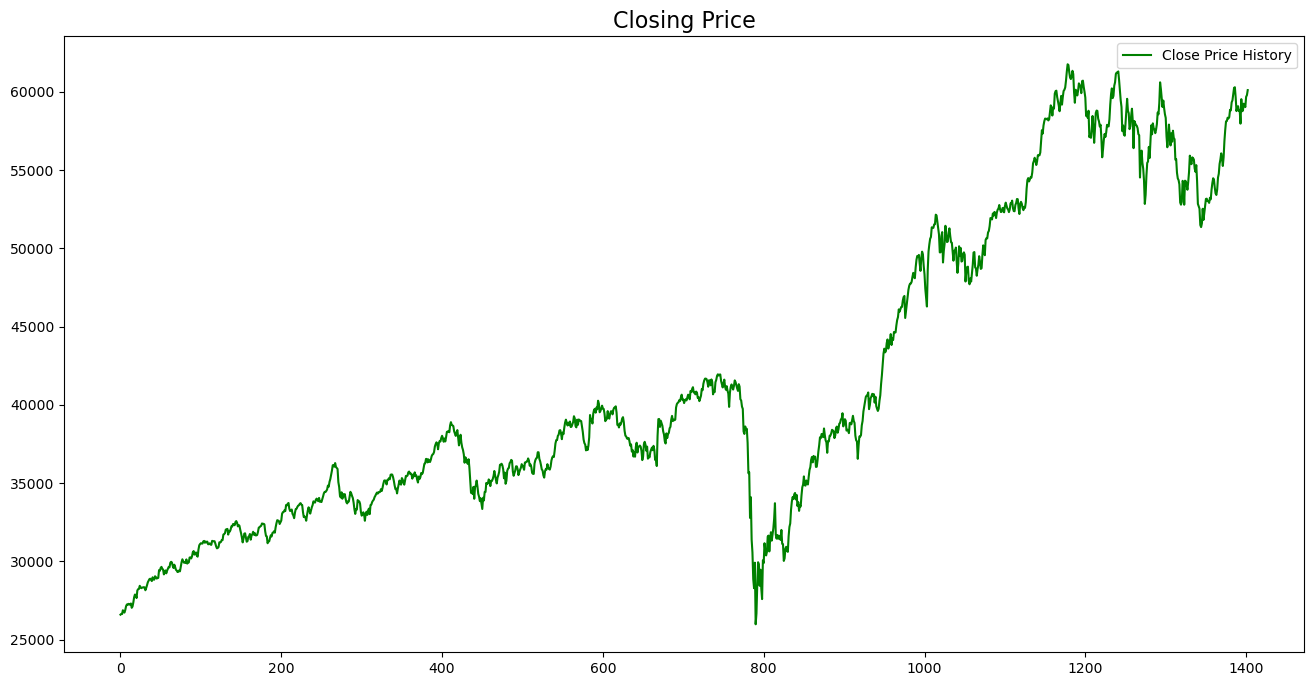

In [31]:
#Closing Price Graph

plt.figure(figsize=(16,8))

plt.plot(stock['Close'],label="Close Price History",color='green')
plt.legend()
plt.title("Closing Price",fontsize=16)

Text(0.5, 1.0, 'Moving Average')

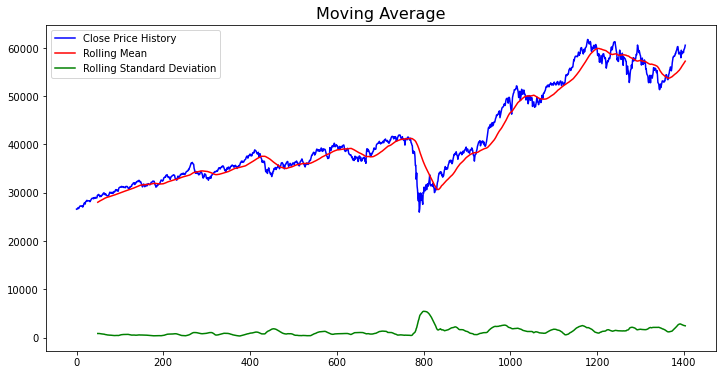

In [80]:
#Plotting the Moving Average.

close=stock['Close']

MA=close.rolling(window=50).mean()
std=close.rolling(window=50).std()

plt.figure(figsize=(12,6))
plt.plot(stock['Close'],label='Close Price History',color='blue')

plt.plot(MA,label='Rolling Mean',color='red')
plt.plot(std,label='Rolling Standard Deviation',color='green')

plt.legend()

plt.title("Moving Average",fontsize=16)



Text(0.5, 1.0, 'Return')

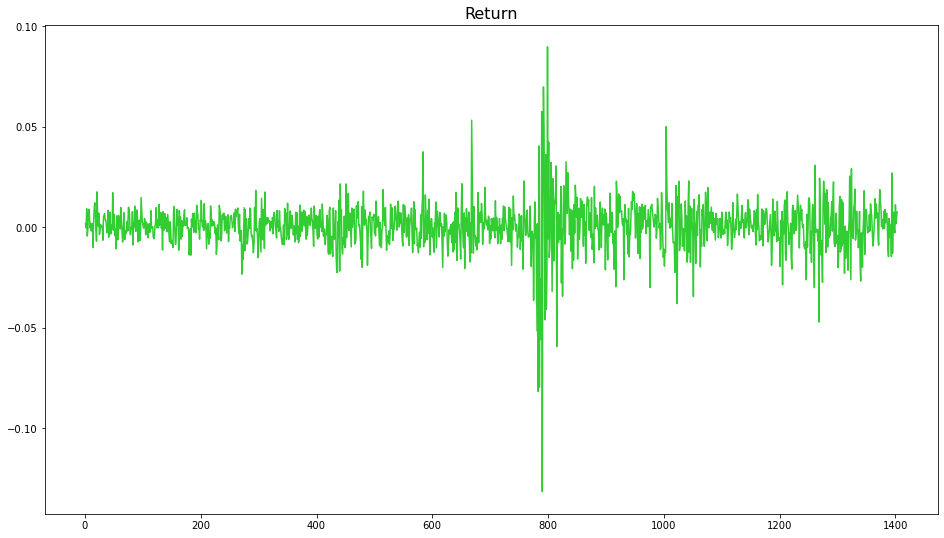

In [81]:
#Plotting the Returns
#A return is the change in price of an asset, investment, 
#or project over time, which may be represented in terms of price change or percentage change. 
#A positive return represents a profit while a negative return marks a loss.

returns=close/close.shift(1)-1

plt.figure(figsize=(16,9))
plt.plot(returns,label='Return',color='limegreen')
plt.title('Return',fontsize=16)


In [82]:
#Stationary Test:

#defining the function

def test_stationary(timeseries):
    rolmean=timeseries.rolling(20).mean()
    rolstd=timeseries.rolling(20).std()
    
    #Plotting the Rolling Statistics.
    
    
    plt.figure(figsize=(16,9))
    plt.plot(timeseries,color='blue',label='Original')
    plt.plot(rolmean,color='red',label="Rolling Mean")
    plt.plot(rolstd,color='green',label="Rolling Standard Deviation")
    plt.legend()
    plt.title('Rolling Mean and Standard Deviation',fontsize=16)
    plt.show(block=False)
    
    
    print("Result of Dickey Fuller Test")
    result=adfuller(timeseries, autolag='AIC')
    labels=['ADF Test Statistics','p-value','Number of Lags Used','Number of Observations Used']
    
    for value,label in zip(result,labels):
        print(label+' : '+ str(value))
   
    
    
    if result[1] <= 0.05:
        print("Strong Evidence against the null hypothesis(H0),Reject the Null Hypothesis. Data is Stationary.")
    else:
        print("Weak Evidence againt null hypothesis,time series is non-stationary.")

In [83]:
#Splitting the data:

train,test=stock[:1123], stock[1123:len(stock)]

In [84]:
train.shape

(1123, 6)

In [85]:
test.shape

(281, 6)

In [86]:
train.head()

,Date,High,Low,Open,Close,Volume
0,2017-01-02,26720.980469,26447.060547,26711.150391,26595.449219,8000.0
1,2017-01-03,26724.400391,26488.369141,26616.919922,26643.240234,9800.0
2,2017-01-04,26723.369141,26606.060547,26677.220703,26633.130859,8100.0
3,2017-01-05,26917.210938,26738.419922,26738.419922,26878.240234,9800.0
4,2017-01-06,27009.609375,26733.330078,26929.689453,26759.230469,7800.0


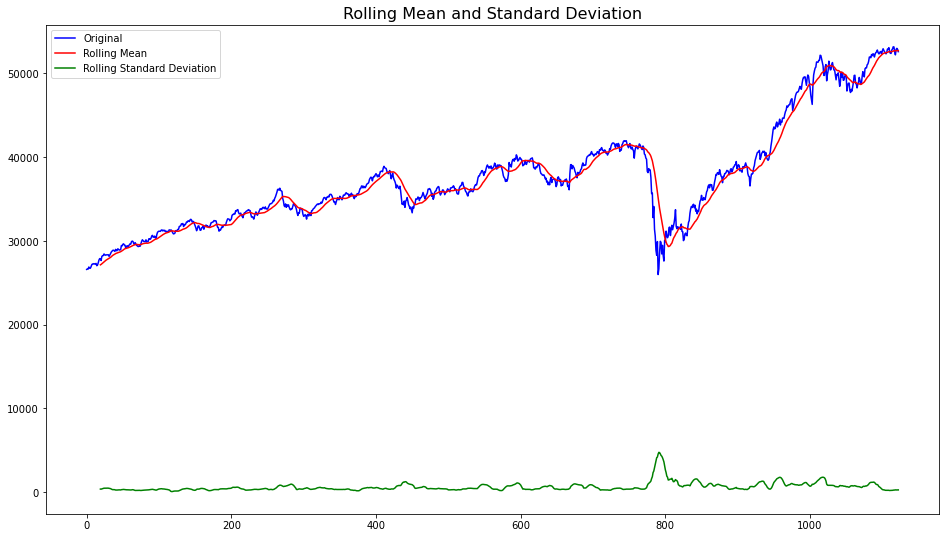

Result of Dickey Fuller Test
ADF Test Statistics : -0.7166228154134389
p-value : 0.8423967431228452
Number of Lags Used : 12
Number of Observations Used : 1110
Weak Evidence againt null hypothesis,time series is non-stationary.


In [88]:
#Applying the stationary test on train close data.

test_stationary(train['Close']) 

In [89]:
np.log(train['Close']).head()    #Log value of closed price ...

0    10.188495
1    10.190291
2    10.189911
3    10.199072
4    10.194635
Name: Close, dtype: float64

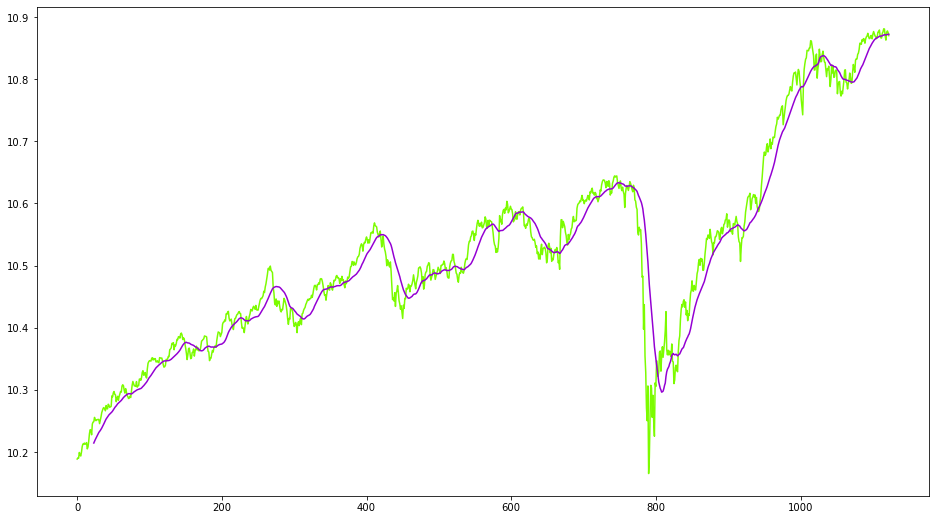

In [90]:
train_log=np.log(train['Close'])
test_log=np.log(test['Close'])


mav=train_log.rolling(24).mean()
plt.figure(figsize=(16,9))

plt.plot(train_log,color='lawngreen')
plt.plot(mav,color='darkviolet')

In [91]:
train_log.dropna(inplace=True)
test_log.dropna(inplace=True)

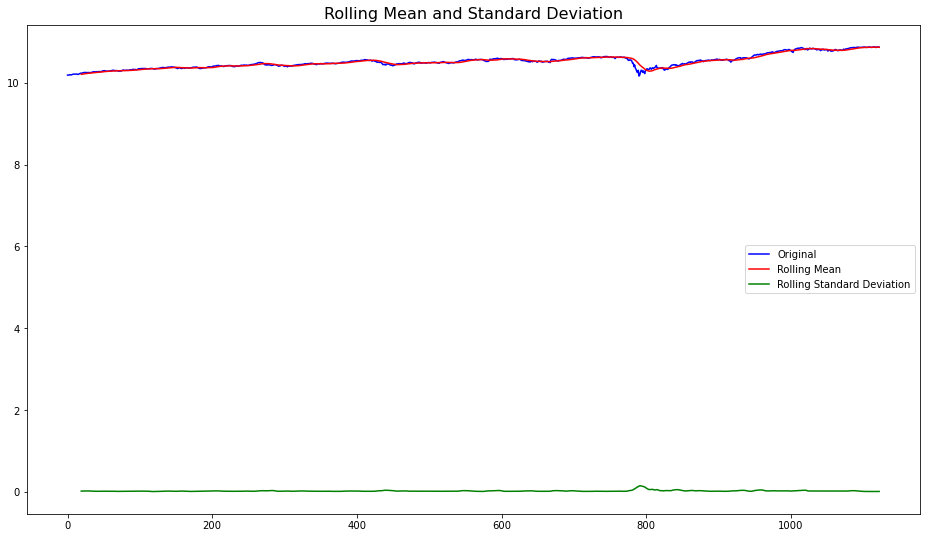

Result of Dickey Fuller Test
ADF Test Statistics : -1.1925202035989495
p-value : 0.6768050264891139
Number of Lags Used : 11
Number of Observations Used : 1111
Weak Evidence againt null hypothesis,time series is non-stationary.


In [92]:
test_stationary(train_log)

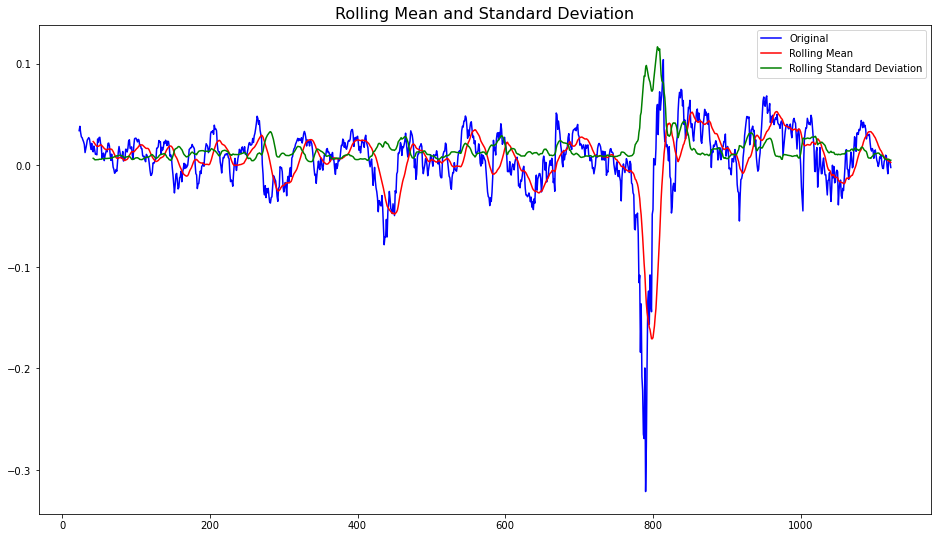

Result of Dickey Fuller Test
ADF Test Statistics : -6.6229900218834885
p-value : 5.97205845071311e-09
Number of Lags Used : 12
Number of Observations Used : 1087
Strong Evidence against the null hypothesis(H0),Reject the Null Hypothesis. Data is Stationary.


In [93]:
train_log_diff=train_log-mav

train_log_diff.dropna(inplace=True)
test_stationary(train_log_diff)

##### Step 7: Training the Model 

In [97]:
#Using the auto ARIMA to make predictions using log data.
model=auto_arima(train_log,trace=True,error_action='ignore',suppress_warnings=True)

model.fit(train_log)

predictions=model.predict(n_periods= len(test))
predictions=pd.DataFrame(predictions, index=test_log.index, columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-6725.009, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6727.560, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6730.254, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6729.995, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6726.711, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-6729.002, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6728.655, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-6727.371, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-6729.019, Time=0.09 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 2.282 seconds


Text(0, 0.5, 'ACTUAL STOCK PRICE')

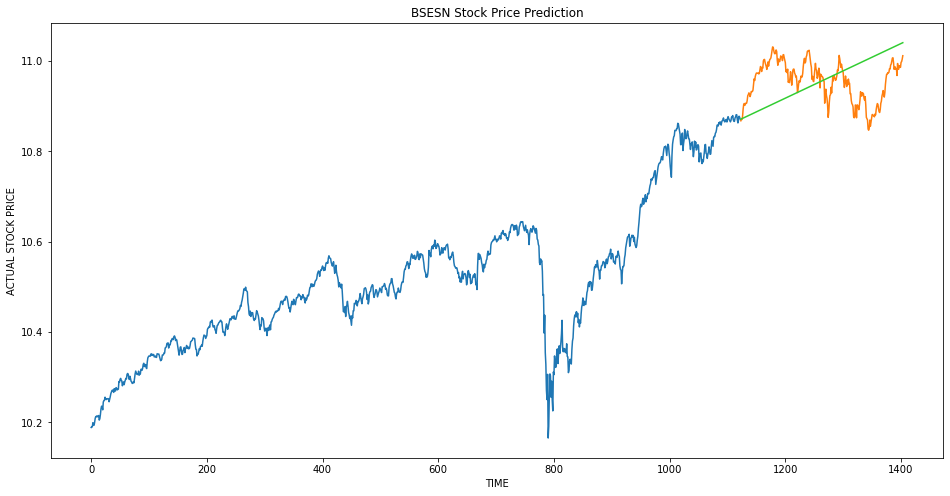

In [98]:
plt.figure(figsize=(16,8))
plt.plot(train_log,label='Train')
plt.plot(test_log,label="Test")
plt.plot(predictions,color='limegreen' ,label="Prediction")

plt.title("BSESN Stock Price Prediction")
plt.xlabel("TIME")
plt.ylabel("ACTUAL STOCK PRICE")

**The Green line depicts the prediction.**

In [100]:
#Root mean squared error.

rmse=np.sqrt(mean_squared_error(test_log,predictions))
print("The Root mean squared error is :",rmse)

The Root mean squared error is : 0.07335943794021116


In [101]:
news.sample(100)

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
3435,2010-07-11,Review Sony Ericsson Xperia X10 Mini What s n...,0.409070,0.060076,-0.9998,0.177,0.719,0.104
576,2002-09-12,Celine Dion romps home at Mysore Cup Dhammapad...,0.424752,0.126515,-0.9993,0.225,0.687,0.088
6810,2019-10-07,Wanna smell fresh all day Apply perfume on th...,0.402612,0.084506,-0.9998,0.140,0.769,0.090
5123,2015-02-23,5 ways to fall asleep faster Marry younger man...,0.392366,0.159565,0.9999,0.110,0.718,0.171
3217,2009-12-05,Ranbir wants Deepika back Salman is Mogambo Wh...,0.379794,0.053381,-0.9999,0.177,0.728,0.095
...,...,...,...,...,...,...,...,...
5678,2016-08-31,Why extra marital affairs could be right Aishw...,0.397560,0.072766,-0.9998,0.140,0.759,0.102
6972,2020-03-17,Two taken into preventive custody for spreadin...,0.364423,0.027964,-1.0000,0.216,0.717,0.067
3155,2009-10-04,Blame your love life for extra bulge Kamal Haa...,0.411189,0.071630,-0.9985,0.133,0.756,0.111
5514,2016-03-20,Different types of social networkers 6 must ...,0.385254,0.108241,-0.9999,0.181,0.696,0.123


### Using different models to determine the best performing model using root mean squared error

#### Step 8: Merge the Numerical and Textual Data

In [102]:
df_merge=pd.merge(headlines_df,stock,how='inner',on='Date')
df_merge

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,High,Low,Open,Close,Volume
0,2017-01-02,Destress plan for the first Monday of 2017 Pun...,0.383537,0.048300,-0.9999,0.170,0.719,0.111,26720.980469,26447.060547,26711.150391,26595.449219,8000.0
1,2017-01-03,State opposition dismisses Samajwadi Party feu...,0.407776,0.039766,-0.9999,0.155,0.739,0.106,26724.400391,26488.369141,26616.919922,26643.240234,9800.0
2,2017-01-04,Rudra Soni ready to go bald for TV not Bollyw...,0.357630,0.072457,-1.0000,0.168,0.742,0.090,26723.369141,26606.060547,26677.220703,26633.130859,8100.0
3,2017-01-05,Decoding Buddhist prayer flags 3 Punjabi films...,0.378495,0.076935,-0.9999,0.158,0.734,0.108,26917.210938,26738.419922,26738.419922,26878.240234,9800.0
4,2017-01-06,Will stay bachelor to serve Akhilesh says thr...,0.393591,0.060879,-0.9999,0.156,0.740,0.104,27009.609375,26733.330078,26929.689453,26759.230469,7800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,2022-03-25,Speeding up shortcuts and tackling unruly cus...,0.368342,-0.006025,-1.0000,0.183,0.742,0.075,57845.371094,57100.238281,57801.718750,57362.199219,6900.0
1288,2022-03-28,As fashion becomes democratic demand for styl...,0.372774,0.060228,-0.9999,0.161,0.740,0.100,57638.339844,56825.089844,57472.718750,57593.488281,6300.0
1289,2022-03-29,Bobby Deol Like my dad I hope to be working ...,0.399341,0.091038,-0.9999,0.161,0.755,0.084,58001.531250,57639.351562,57814.761719,57943.648438,12100.0
1290,2022-03-30,I will not give in to trends Dossmode The tim...,0.335133,0.037703,-0.9999,0.159,0.767,0.074,58727.781250,58176.000000,58362.851562,58683.988281,6300.0


#### Step 9: Creating a Dataset for Model Training

In [103]:
final=df_merge[['Close','Subjectivity','Polarity','Compound','Negative','Neutral','Positive']]
final

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,26595.449219,0.383537,0.048300,-0.9999,0.170,0.719,0.111
1,26643.240234,0.407776,0.039766,-0.9999,0.155,0.739,0.106
2,26633.130859,0.357630,0.072457,-1.0000,0.168,0.742,0.090
3,26878.240234,0.378495,0.076935,-0.9999,0.158,0.734,0.108
4,26759.230469,0.393591,0.060879,-0.9999,0.156,0.740,0.104
...,...,...,...,...,...,...,...
1287,57362.199219,0.368342,-0.006025,-1.0000,0.183,0.742,0.075
1288,57593.488281,0.372774,0.060228,-0.9999,0.161,0.740,0.100
1289,57943.648438,0.399341,0.091038,-0.9999,0.161,0.755,0.084
1290,58683.988281,0.335133,0.037703,-0.9999,0.159,0.767,0.074


#### Step 10:Normalize Data

In [104]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [105]:
df=pd.DataFrame(scaler.fit_transform(final))
df.columns=final.columns
df.index=final.index

In [106]:
df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.017164,0.493808,0.447466,0.00005,0.643411,0.12500,0.686747
1,0.018500,0.669637,0.379328,0.00005,0.527132,0.25000,0.626506
2,0.018217,0.305881,0.640336,0.00000,0.627907,0.26875,0.433735
3,0.025067,0.457231,0.676091,0.00005,0.550388,0.21875,0.650602
4,0.021741,0.566736,0.547902,0.00005,0.534884,0.25625,0.602410


In [107]:
X=df.drop('Close',axis=1)   #Features
X

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.493808,0.447466,0.00005,0.643411,0.12500,0.686747
1,0.669637,0.379328,0.00005,0.527132,0.25000,0.626506
2,0.305881,0.640336,0.00000,0.627907,0.26875,0.433735
3,0.457231,0.676091,0.00005,0.550388,0.21875,0.650602
4,0.566736,0.547902,0.00005,0.534884,0.25625,0.602410
...,...,...,...,...,...,...
1287,0.383585,0.013734,0.00000,0.744186,0.26875,0.253012
1288,0.415735,0.542699,0.00005,0.573643,0.25625,0.554217
1289,0.608448,0.788692,0.00005,0.573643,0.35000,0.361446
1290,0.142690,0.362859,0.00005,0.558140,0.42500,0.240964


In [108]:
y=df['Close']              #Target
y

0       0.017164
1       0.018500
2       0.018217
3       0.025067
4       0.021741
          ...   
1287    0.876946
1288    0.883410
1289    0.893195
1290    0.913884
1291    0.910657
Name: Close, Length: 1292, dtype: float64

#### Step 11: Splitting the Data

In [109]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

#### Step 8: Deploying Different Models

* Applying Random Forest Regressor

In [110]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print("Mean Squared Error : ",mean_squared_error(y_pred,y_test))


Mean Squared Error :  0.058580517630070564


* Applying Decision Tree Regressor

In [111]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

y_pred=dt.predict(X_test)
print("Mean Squared Error : ",mean_squared_error(y_pred,y_test))

Mean Squared Error :  0.0977920458625032


* Applying AdaBoost Regressor

In [112]:
from sklearn.ensemble import AdaBoostRegressor

adb=AdaBoostRegressor()
adb.fit(X_train,y_train)

y_pred=adb.predict(X_test)
print("Mean Squared Error : ",mean_squared_error(y_pred,y_test))

Mean Squared Error :  0.05782615019672828


* Applying LGBM Regressor

In [113]:
!pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [114]:
import lightgbm

gbm=lightgbm.LGBMRegressor()

gbm.fit(X_train,y_train)


y_pred=gbm.predict(X_test)
print("Mean Squared Error : ",mean_squared_error(y_pred,y_test))

Mean Squared Error :  0.06384946650767759


* Applying XGBoost Regressor

In [115]:
!pip install xgboost

In [116]:
import xgboost as xgb

xgb=xgb.XGBRegressor()
xgb.fit(X_train,y_train)

y_pred=xgb.predict(X_test)
print("Mean Squared Error : ",mean_squared_error(y_pred,y_test))

Mean Squared Error :  0.0680421510332517


#### CONCLUSION :
                                          MEAN_SQUARED_ERROR

* RANDOM FOREST REGRESSOR MODEL  : 0.058580517630070564
    
* DECISION TREE REGRESSOR MODEL  : 0.0977920458625032
    
* ADABOOST REGRESSOR  MODEL      : 0.05782615019672828
    
* LGBM MODEL                     : 0.06384946650767759

* XGBOOST MODEL                  : 0.0680421510332517
##### THE BEST PERFORMING MODEL IS ADABOOST REGRESSOR.